In [13]:
from inverse import fit_linear
import numpy as np
from tools.reportParser import parse_all_files


def save_as_dataset(dataset, name, regularization_list, generate_distribution=False):
    path = f'../data/datasets/{name}.npz'
    pressures = np.load("../data/initial kernels/Pressure_Silica.npy")
    pore_widths = np.load("../data/initial kernels/Size_Kernel_Silica_Adsorption.npy")

    ###  kernel for pore dist generation
    kernel = np.load("../data/initial kernels/Kernel_Silica_Adsorption.npy")[:, 77:367]
    ###
    alpha_arr = [0]
    dataset_size = len(dataset) * len(alpha_arr)
    isotherm_data = np.empty((dataset_size, pressures[77:367].size))
    pore_distribution_data = np.empty((dataset_size, pore_widths.size))
    for i, data in enumerate(dataset):
        print(f"isotherm number {i} out of {dataset_size}")
        isotherm_data[i] = np.interp(pressures[77:367], data['p_adsorption'], data['adsorption'])
        if generate_distribution:
            pore_distribution_data[i] = fit_linear(adsorption=isotherm_data[i], kernel=kernel, alpha=regularization_list[i]).x
        else:
            pore_distribution_data[i] = np.interp(pore_widths, data['pore_size'], data['distribution'])
    with open(path, "wb") as f:
        np.savez_compressed(f, isotherm_data=isotherm_data,
                            pore_distribution_data=pore_distribution_data)
        
import pandas as pd
dataset, paths = parse_all_files('../data/reports/')

regularization_list = pd.read_csv("tyhonov.csv")._get_column_array(3)
# save_as_dataset(dataset, "reports_best_tyhanov", regularization_list=regularization_list, generate_distribution=True)

C:\Users\ivano\PycharmProjects\isotherm\tools\reportParser.py:34: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(io.StringIO(value), sep="\s+|\t+|\s+\t+|\t+\s+")
C:\Users\ivano\PycharmProjects\isotherm\tools\reportParser.py:34: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(io.StringIO(value), sep="\s+|\t+|\s+\t+|\t+\s+")
C:\Users\ivano\PycharmProjects\isotherm\tools\reportParser.py:34: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you

In [14]:
cut_dataset = []
pressures = np.load("../data/initial kernels/Pressure_Silica.npy")
for iso in dataset:
    if iso['p_adsorption'][0] > pressures[77] or iso['p_adsorption'][-1] < pressures[-10] :
        continue
    cut_dataset.append(iso)
len(cut_dataset)

609

In [15]:
first_lst = []
last_lst = []
for iso in dataset:
    first_lst.append(iso['p_adsorption'][0])
    last_lst.append(iso['p_adsorption'][-1])
print(max(first_lst), min(last_lst))

0.0733296 0.967889


In [16]:
name = "reports_best_tyhanov"

path = f'../data/datasets/{name}.npz'
pressures = np.load("../data/initial kernels/Pressure_Silica.npy")
pore_widths = np.load("../data/initial kernels/Size_Kernel_Silica_Adsorption.npy")

    ###  kernel for pore dist generation
interpolated_kernel_isotherms = []
kernel = np.load("../data/initial kernels/Kernel_Silica_Adsorption.npy")
for i in range(len(kernel)):
    interpolated_kernel_isotherms.append(kernel[i][77:-10])
interpolated_kernel_isotherms = np.array(interpolated_kernel_isotherms)
    ###
alpha_arr = [0]
dataset_size = len(dataset) * len(alpha_arr)
isotherm_data = np.empty((dataset_size, pressures[77:-10].size))
pore_distribution_data = np.empty((dataset_size, pore_widths.size))

In [22]:
i =201
data = dataset[i]
isotherm_data[i] = np.interp(pressures[77:-10], data['p_adsorption'], data['adsorption'])
pore_distribution_data[i] = fit_linear(adsorption=isotherm_data[i], kernel=interpolated_kernel_isotherms, alpha=regularization_list[i]).x

In [23]:
import matplotlib.pyplot as plt

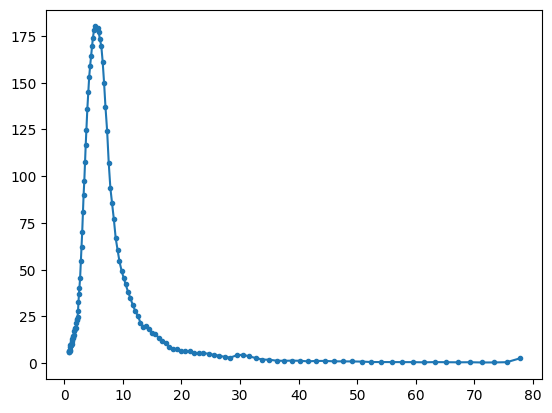

371


In [24]:
#plt.plot(isotherm_data[i], marker=".")
plt.plot(pore_widths, pore_distribution_data[i], marker=".")
plt.show()
print(len(isotherm_data[i]))

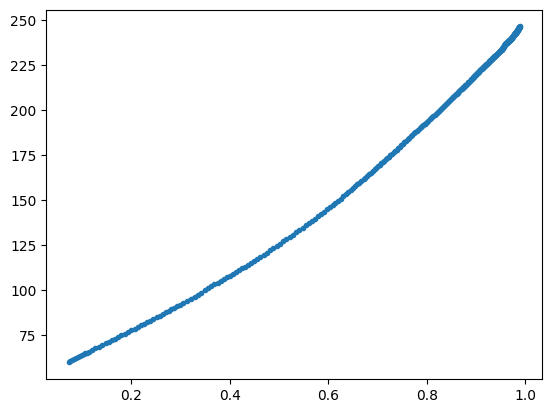

In [25]:
plt.plot(pressures[77:-10],isotherm_data[i], marker=".")
plt.show()